# Lecture 7 - Uncertainty Propagation using Polynomial Chaos II

## Objectives

+ Objective 1: Learn about the stochastic collocation method 
+ Efficient mehtods for high-d integration 
+ Objective 2: Extensions, challenges, and open questions of polynomial chaos


## Readings

+ Numerical Methods for Stochastic Computations: A Spectral Method Approach (Dongbin Xiu, 2010)

+ Uncertainty Quantification: Theory, Implementation, and Applications (Ralph C. Smith, 2014) 


## A brief reminder

![](figures/collocation1.png)


## Fields and KL expansions

![](figures/kl1.png)


## Fields and KL expansions

![](figures/kl2.png)


## Fields and KL expansions

![](figures/kl3.png)


## Fields and KL expansions

![](figures/kl4.png)


## Fields and KL expansions

![](figures/kl5.png)


## Fields and KL expansions

![](figures/kl6.png)


## Stochastic collocation method

![](figures/collocation2.png)


## Stochastic collocation method

![](figures/collocation3.png)


## Stochastic collocation method

![](figures/collocation4.png)


## Stochastic collocation method

![](figures/collocation5.png)


## Stochastic collocation method

![](figures/collocation6.png)


## Stochastic collocation method

![](figures/collocation7.png)


## Stochastic collocation method

![](figures/collocation8.png)


## Case Studies: Solving Stochastic ODEs using the Collocation Approach
It is easy to show that the coefficients of $y(t;\xi)$ expanded in the basis of $\phi_i(\xi)$,
$$
y(t;\xi) = \sum_{k=1}^{d_y}y_k(t)\phi_k(\xi),
$$
are given by:
$$
y_k(t) = \langle y\phi_k\rangle = \int y(t;\xi)\phi_k(\xi)p(\xi)d\xi.$$


Therefore, if we could evaluate the solution of the ODE for any given $\xi$ we could compute them by simply approximating the RHS integral via a quadrature rule.
In particular, we have:
$$
y_k(t) \approx \sum_{n=1}^N w^{(n)} y(t;\xi^{(n)})\phi_k(\xi^{(n)}).
$$
Let's do this an compare the results to the ones we obtained with the Galarkin approach.

In [140]:
# We are going to use the quadrature points in quad (quad.w, quad.x)
# Here, we will store the coefficients of the expansion at each timestep:
y_col = np.zeros(y.shape) # y is the matrix in which we stored the Galerkin solution.
# Matrix containing the value of the polynomials on the quadrature points
Phi = phi(quad.x)
# Loop over all the quadrature points
for n in xrange(quad.x.shape[0]):
    # Solve the problem at this quadrature point
    k = 0.1 + 0.01 * quad.x[n]
    y_sample = scipy.integrate.odeint(rhs_deter, [1.], t, args=(k,)).flatten()
    # Update y_col
    y_col += quad.w[n] * np.einsum('t,k->tk', y_sample, Phi[n, :])
# Now, this is the mean predicted by collocation:
y_col_m = y_col[:, 0]
# Variance
y_col_v = np.sum(y_col[:, 1:] ** 2., axis=1)

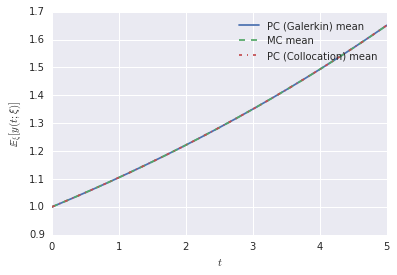

In [145]:
# Comparing the means:
plt.plot(t, y_m, label='PC (Galerkin) mean')
plt.plot(t, y_mc_m, '--', label='MC mean')
plt.plot(t, y_col_m, '-.', label='PC (Collocation) mean')
plt.legend()
plt.xlabel('$t$')
plt.ylabel(r'$\mathbb{E}_{\xi}[y(t;\xi)]$')

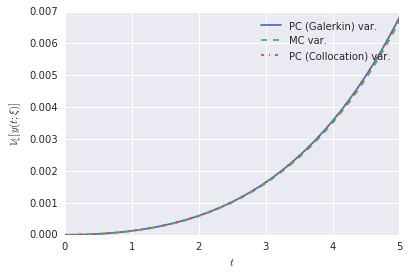

In [144]:
# Comparing the variances:
plt.plot(t, y_v, label='PC (Galerkin) var.')
plt.plot(t, y_mc_v, '--', label='MC var.')
plt.plot(t, y_col_v, '-.', label='PC (Collocation) var.')
plt.legend()
plt.xlabel('$t$')
plt.ylabel(r'$\mathbb{V}_{\xi}[y(t;\xi)]$')

## Stochastic collocation method

![](figures/collocation9.png)


## Stochastic collocation method

![](figures/collocation10.png)


## Stochastic collocation method

![](figures/collocation11.png)


## Stochastic collocation method

![](figures/collocation12.png)


## Stochastic collocation method

![](figures/collocation13.png)


## Stochastic collocation method

![](figures/collocation14.png)


## Stochastic collocation method

![](figures/collocation15.png)


## Stochastic collocation method

![](figures/collocation16.png)


## Stochastic collocation method

![](figures/collocation17.png)


## Stochastic collocation method

![](figures/collocation18.png)


## Stochastic collocation method

![](figures/collocation19.png)


## Stochastic collocation method

![](figures/collocation20.png)


## Stochastic collocation method

![](figures/collocation21.png)


## Stochastic collocation method

![](figures/collocation22.png)


## Stochastic collocation method

![](figures/collocation23.png)


## Stochastic collocation method

![](figures/collocation24.png)


## Stochastic collocation method

![](figures/collocation25.png)


## Stochastic collocation method

![](figures/collocation26.png)


## Lecture outline

![](figures/hd1.png)


## A brief overview

![](figures/hd2.png)


## A brief overview

![](figures/hd3.png)


## Uncertain geometries

![](figures/hd4.png)


## Uncertain geometries

![](figures/hd5.png)


## Uncertain geometries

![](figures/hd6.png)


## Uncertain geometries

![](figures/hd7.png)


## Uncertain geometries

![](figures/hd8.png)


## Uncertain geometries summary

![](figures/hd9.png)


## ANOVA Expansions

![](figures/a1.png)


## ANOVA Expansions

![](figures/a2.png)


## ANOVA Expansions

![](figures/a3.png)


## ANOVA Expansions

![](figures/a4.png)


## ANOVA Expansions

![](figures/a5.png)


## ANOVA Expansions

![](figures/a6.png)


## ANOVA Expansions

![](figures/a7.png)


## ANOVA Expansions

![](figures/a8.png)


## ANOVA Expansions

![](figures/a9.png)


## ANOVA Expansions

![](figures/a10.png)


## ANOVA Expansions

![](figures/a11.png)


## ANOVA Expansions

![](figures/a12.png)


## ANOVA Expansions

![](figures/a13.png)


## ANOVA Expansions

![](figures/a14.png)


## ANOVA Expansions

![](figures/a15.png)


## ANOVA Expansions

![](figures/a16.png)


## ANOVA Expansions

![](figures/a17.png)


## ANOVA Expansions

![](figures/a18.png)


## Other developments

![](figures/a19.png)


## Open questions and challenges

![](figures/a20.png)


## Open questions and challenges

![](figures/a21.png)


## Open questions and challenges

![](figures/a22.png)


## References

![](figures/a23.png)


## References

![](figures/a24.png)
